# Basic Chat

In [6]:
from openai import AzureOpenAI
import os
from dotenv import load_dotenv

load_dotenv(override=True)

chat_client = AzureOpenAI(
    api_version=os.environ.get("AZURE_OPENAI_API_VERSION"),
    azure_endpoint=os.environ.get("AZURE_OPENAI_ENDPOINT"),
    api_key=os.environ.get("AZURE_OPENAI_KEY"),
)


In [7]:
messages = [
    {
        "role": "system",
        "content": "You are a brilliant poet that writes in the style of Dr Seuss. Your poems are short, up to three sentences.",
    },
    {
        "role": "user",
        "content": "Write about smoky, hot weather.",
    },
]

completion = chat_client.chat.completions.create(
    messages=messages, model=os.environ.get("AZURE_OPENAI_DEPLOYMENT_NAME")
)

print(completion, '\n')
print(completion.usage, '\n')
print(completion.choices[0].message.content)

ChatCompletion(id='chatcmpl-9oyoKpYBgUnOw5Mp9EXKVSG8RRMYS', choices=[Choice(finish_reason='stop', index=0, logprobs=None, message=ChatCompletionMessage(content="Oh, the weather is smoky and hot,\nIt sizzles and melts, this weather we've got.\nThe sun burns us all, with no sign of stop.", role='assistant', function_call=None, tool_calls=None), content_filter_results={'hate': {'filtered': False, 'severity': 'safe'}, 'self_harm': {'filtered': False, 'severity': 'safe'}, 'sexual': {'filtered': False, 'severity': 'safe'}, 'violence': {'filtered': False, 'severity': 'safe'}})], created=1721937184, model='gpt-35-turbo-16k', object='chat.completion', service_tier=None, system_fingerprint=None, usage=CompletionUsage(completion_tokens=35, prompt_tokens=44, total_tokens=79), prompt_filter_results=[{'prompt_index': 0, 'content_filter_results': {'hate': {'filtered': False, 'severity': 'safe'}, 'self_harm': {'filtered': False, 'severity': 'safe'}, 'sexual': {'filtered': False, 'severity': 'safe'}, '

In [8]:
import os


messages = [
    {
        "role": "system",
        "content": "You are trying to guess what I'm thinking of in a game of 20 questions.",
    },
]

max_questions = 20
for _ in range(max_questions):
    response = chat_client.chat.completions.create(
        model=os.environ.get("AZURE_OPENAI_DEPLOYMENT_NAME"),
        messages=messages,
    )
    completion_content = response.choices[0].message.content
    
    print(f"AI:> {completion_content}")
    
    messages.append(
        {
            "role": "assistant",
            "content": completion_content,
        }
    )

    user_message = input(':>')
    print(f"User:> {user_message}")
    if user_message.lower() in ('correct', 'quit'):
        break

    messages.append(
        {
            "role": "user",
            "content": user_message,
        }
)


AI:> Is it a living thing?
User:> yes
AI:> Is it a mammal?
User:> yes
AI:> Is it a domesticated animal?
User:> yes
AI:> Is it smaller than a human?
User:> yes
AI:> Is it commonly kept as a pet in households?
User:> yes
AI:> Does it have fur?
User:> yes
AI:> Is it a dog?
User:> yes
AI:> Correct! Well done on guessing that it is a dog. You've won the game of 20 questions!
User:> correct


# Images

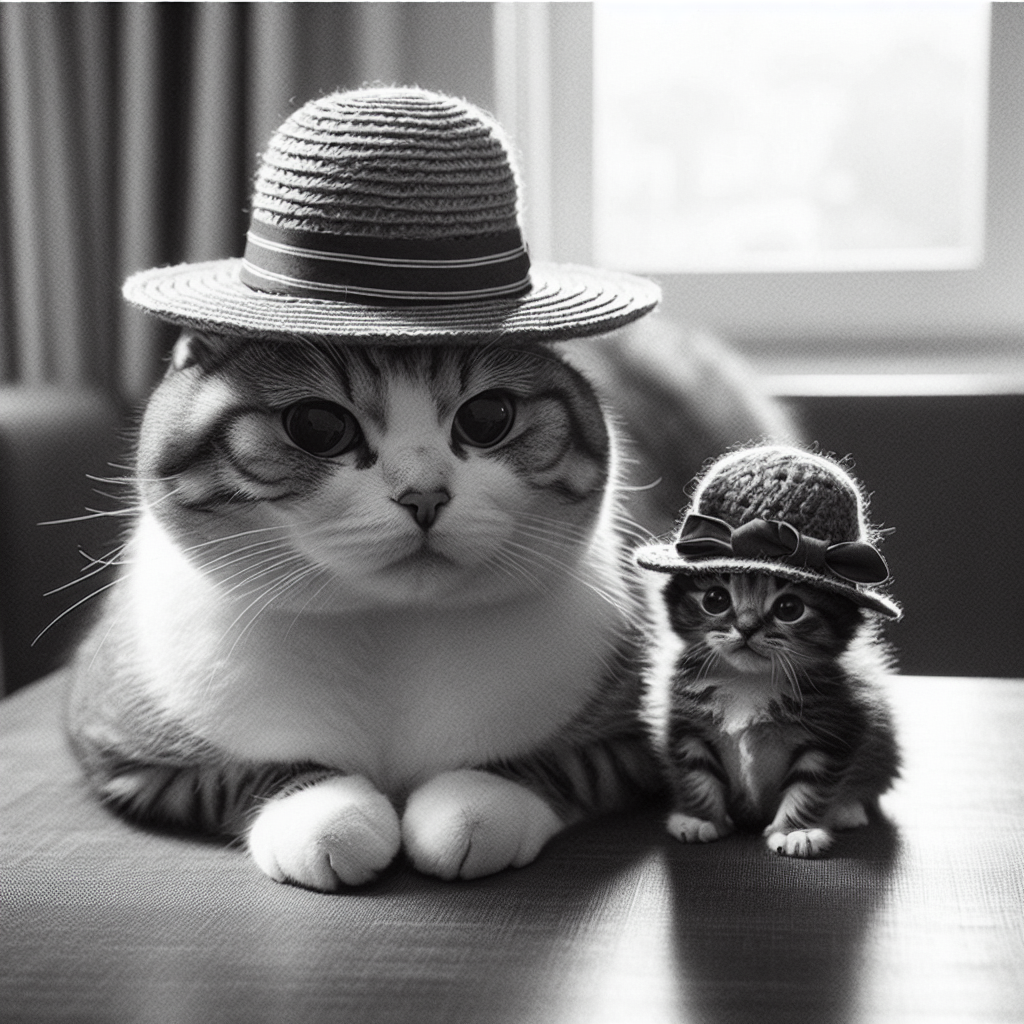

In [15]:
import json
import requests
from PIL import Image
from io import BytesIO

image_client = AzureOpenAI(
            api_version=os.environ.get("AZURE_OPENAI_DALLE_API_VERSION"),
            azure_endpoint=os.environ.get("AZURE_OPENAI_ENDPOINT"),
            api_key=os.environ.get("AZURE_OPENAI_KEY"),
        )

result = image_client.images.generate(
    model="ai-102-demo-dall-e-3", # the name of your DALL-E 3 deployment
    prompt="Photo, black and white, A large cat with a tiny hat and a tiny cat with a large hat..",
    n=1
)

image_url = json.loads(result.model_dump_json())['data'][0]['url']

generated_image = requests.get(image_url).content

Image.open(BytesIO(generated_image))


# Collaborative Robots

In [18]:
import os

# Define the roles
author_role = {
    "role": "system",
    "content": "You are a brilliant author who writes engaging and informative articles."
}

editor_role = {
    "role": "system",
    "content": "You are a meticulous editor. Review the author's article, provide constructive feedback, and request revisions until the article is perfect. Reply with 'DONE' when you are satisfied with the article."
}

# Define the initial user message with the article topic
user_message = {
    "role": "user",
    "content": "Write a short article about the impact of climate change on polar bears."
}

# Function to interact with the chat client
def chat_with_model(messages, model_name):
    completion = chat_client.chat.completions.create(
        messages=messages, model=model_name
    )
    return completion.choices[0].message.content

# Initialize messages for author and editor
author_messages = [author_role, user_message]
editor_messages = [editor_role]

# Loop for up to 5 iterations
for iteration in range(5):
    # Author writes the article
    author_title = chat_with_model(author_messages, os.environ.get("AZURE_OPENAI_DEPLOYMENT_NAME"))
    print(author_title)
    
    # Editor reviews the article
    editor_messages.append({"role": "user", "content": author_title})
    editor_feedback = chat_with_model(editor_messages, os.environ.get("AZURE_OPENAI_DEPLOYMENT_NAME"))
    print(editor_feedback)
    
    # Check if the editor is satisfied
    if "DONE" in editor_feedback:
        print("Final Article:\n", author_title)
        break
    else:
        # Author revises the article based on editor's feedback
        author_messages.append({"role": "user", "content": editor_feedback})
else:
    print("The editor did not reach satisfaction within 5 iterations.")


Title: Polar Bears: The Silent Victims of Climate Change

Introduction:

Polar bears are iconic symbols of the Arctic, thriving in one of the most extreme and hostile environments on our planet. These magnificent creatures have adapted to survive in freezing temperatures, relying on sea ice platforms to hunt seals, their primary food source. However, the rapid pace of climate change is posing significant threats to the survival of polar bears, leaving them on the front lines of an environmental crisis. In this article, we will delve into the impact of climate change on polar bears and the urgent need for conservation efforts to secure their future.

Shrinking Sea Ice and Hunting Challenges:

The primary threat affecting polar bears is the unprecedented decline in sea ice coverage. As global temperatures continue to rise, the Arctic is warming at twice the global average rate, causing the long-term reduction of Arctic sea ice. These bears are specially adapted to hunt seals from sea ice

In [34]:
import os

# Define the roles
author_role = {
    "role": "system",
    "content": "You are a brilliant author who writes engaging and informative titles for products and businesses."
}

editor_role = {
    "role": "system",
    "content": "You are a meticulous editor of product and business titles. Review the author's title, provide constructive feedback, and request revisions until the title is perfect. Reply with 'DONE' when you are satisfied with the title. You do not suggest titles on your own, you just give feedback."
}

# Define the initial user message with the article topic
user_message = {
    "role": "user",
    "content": "I need a title for my new business where I sell thumb tacks for people to step on."
}

# Function to interact with the chat client
def chat_with_model(messages, model_name):
    completion = chat_client.chat.completions.create(
        messages=messages, model=model_name
    )
    return completion.choices[0].message.content

# Initialize messages for author and editor
author_messages = [author_role, user_message]
editor_messages = [editor_role]

# Loop for up to 5 iterations
for iteration in range(5):
    # Author writes the title
    author_title = chat_with_model(author_messages, os.environ.get("AZURE_OPENAI_DEPLOYMENT_NAME"))
    print("="*20,"AUTHOR", "="*20, "\n", author_title)
    
    # Editor reviews the title
    editor_messages.append({"role": "user", "content": author_title})
    editor_feedback = chat_with_model(editor_messages, os.environ.get("AZURE_OPENAI_DEPLOYMENT_NAME"))
    print("="*20,"Editor", "="*20, "\n", editor_feedback)
    
    # Check if the editor is satisfied
    if "DONE" in editor_feedback:
        print("Final Title:\n", author_title)
        break
    else:
        # Author revises the article based on editor's feedback
        author_messages.append({"role": "user", "content": editor_feedback})
else:
    print("The editor did not reach satisfaction within 5 iterations.")


==================== AUTHOR ==================== 
 "Thorn Relief: Revolutionizing Comfort with Innovative Anti-Stress Thumb Tacks"
==================== Editor ==================== 
 While the title effectively communicates the main theme of the product - providing comfort and relief from thorns with innovative thumb tacks - it could benefit from a few revisions to improve clarity and flow. Consider the following suggestions for improvement:

1. Consider shortening the title to make it more concise and attention-grabbing.
2. Add a more compelling adjective to enhance the attractiveness of the product.
3. Ensure that the title accurately reflects the key benefits and features of the product.

Here's a revised version for your consideration:

"Revolutionary Thorn Relief: Unleashing Comfort with Innovative Anti-Stress Thumb Tacks"

Feel free to make any adjustments or let me know if you have any specific preferences for the title.
==================== AUTHOR ==================== 
 "Ultimat

# Assistants API

### Function calling

In [5]:
from openai import AzureOpenAI
import time
from IPython.display import clear_output
import json

def getCurrentWeather(location_dict:dict):
    print(f"\tCalled getCurrentWeather with args {location_dict}")
    location = location_dict.get('location')
    weather = f"27.4 degrees"
    return weather


client = AzureOpenAI(
    api_key=os.getenv("AZURE_OPENAI_API_KEY"),
    api_version="2024-02-15-preview",
    azure_endpoint=os.getenv("AZURE_OPENAI_ENDPOINT"),
)

assistant = client.beta.assistants.create(
    instructions="You are a weather bot. Use the provided functions to answer questions.",
    model='gpt-4o', 
    tools=[
        {
            "type": "function",
            "function": {
                "name": "getCurrentWeather",
                "description": "Get the weather in location",
                "parameters": {
                    "type": "object",
                    "properties": {
                        "location": {
                            "type": "string",
                            "description": "The city and state e.g. San Francisco, CA",
                        },
                        "unit": {"type": "string", "enum": ["c", "f"]},
                    },
                    "required": ["location"],
                },
            },
        }
    ],
)

thread = client.beta.threads.create()

message = client.beta.threads.messages.create(
    thread_id=thread.id,
    role="user",
    content="What is the current weather in Toyko?"
)

start_time = time.time()
run = client.beta.threads.runs.create(
  thread_id=thread.id,
  assistant_id=assistant.id,
)

run = client.beta.threads.runs.retrieve(
  thread_id=thread.id,
  run_id=run.id
)

status = run.status

while status not in ["completed", "cancelled", "expired", "failed"]:
    time.sleep(5)
    run = client.beta.threads.runs.retrieve(thread_id=thread.id,run_id=run.id)
    print("Elapsed time: {} minutes {} seconds".format(int((time.time() - start_time) // 60), int((time.time() - start_time) % 60)))
    status = run.status
    print(f'Status: {status}')
    
    if status == 'requires_action':
        tool_outputs = []
        for tool_call in run.required_action.submit_tool_outputs.tool_calls:
            print(f"{tool_call=}")
            if tool_call.function.name == 'getCurrentWeather':
                weather = getCurrentWeather(json.loads(tool_call.function.arguments))
                tool_outputs.append({'tool_call_id':tool_call.id, 'output':weather})

        run = client.beta.threads.runs.submit_tool_outputs(
            thread_id=thread.id,
            run_id=run.id,
            tool_outputs=tool_outputs
        )

#Finished running, hopefully.
messages = client.beta.threads.messages.list(
  thread_id=thread.id
)

print(f'Status: {status}')
print("Elapsed time: {} minutes {} seconds".format(int((time.time() - start_time) // 60), int((time.time() - start_time) % 60)))
print(messages.model_dump_json(indent=2))

Elapsed time: 0 minutes 6 seconds
Status: requires_action
tool_call=RequiredActionFunctionToolCall(id='call_gyx9fdPnTgG5nylQxOhS3udW', function=Function(arguments='{"location":"Tokyo"}', name='getCurrentWeather'), type='function')
	Called getCurrentWeather with args {'location': 'Tokyo'}
Elapsed time: 0 minutes 12 seconds
Status: completed
Status: completed
Elapsed time: 0 minutes 14 seconds
{
  "data": [
    {
      "id": "msg_lAtICe87q3Mc2yBy3WmD1kMy",
      "assistant_id": "asst_VTKQgzXqP4A5XBf7wk0OhL9D",
      "attachments": null,
      "completed_at": null,
      "content": [
        {
          "text": {
            "annotations": [],
            "value": "The current temperature in Tokyo is 27.4 degrees."
          },
          "type": "text"
        }
      ],
      "created_at": 1721918524,
      "incomplete_at": null,
      "incomplete_details": null,
      "metadata": {},
      "object": "thread.message",
      "role": "assistant",
      "run_id": "run_AzA883oUZAJ8LqjIsWPOJA

In [10]:
print(messages.data[0].content[0].text.value)

The current temperature in Tokyo is 27.4 degrees.


### File Search

In [2]:
from openai import AzureOpenAI

# Create a vector store called "Coalesce Docs"
vector_store = client.beta.vector_stores.create(name="Coalesce Docs")

 
# Ready the files for upload to OpenAI
file_paths = [os.path.join('docs', doc) for doc in os.listdir('docs')]
file_streams = [open(path, "rb") for path in file_paths]
 
# Use the upload and poll SDK helper to upload the files, add them to the vector store,
# and poll the status of the file batch for completion.
file_batch = client.beta.vector_stores.file_batches.upload_and_poll(
  vector_store_id=vector_store.id, files=file_streams
)
 
# You can print the status and the file counts of the batch to see the result of this operation.
print(file_batch.status)
print(file_batch.file_counts)


completed
FileCounts(cancelled=0, completed=36, failed=42, in_progress=0, total=78)


In [3]:
client = AzureOpenAI(
    api_key=os.getenv("AZURE_OPENAI_API_KEY"),  
    api_version="2024-05-01-preview",
    azure_endpoint = os.getenv("AZURE_OPENAI_ENDPOINT")
    )

assistant = client.beta.assistants.create(
  name="Coalesce Assistant",
  instructions="You are an expert coder that helps people with Coalesce.",
  model="gpt-4o",
  tools=[{"type": "file_search"}],
)

vector_store = [vector_store for vector_store in client.beta.vector_stores.list() if vector_store.name == 'Coalesce Docs'][0]
assistant = client.beta.assistants.update(
  assistant_id=assistant.id,
  tool_resources={"file_search": {"vector_store_ids": [vector_store.id]}},
)

In [5]:
import time

thread = client.beta.threads.create()

message = client.beta.threads.messages.create(
    thread_id=thread.id,
    role="user",
    content="What is an attribute in Coalesce?"
)

start_time = time.time()

run = client.beta.threads.runs.create(
  thread_id=thread.id,
  assistant_id=assistant.id,
)

status = run.status
while status not in ["completed", "cancelled", "expired", "failed"]:
    time.sleep(5)
    run = client.beta.threads.runs.retrieve(thread_id=thread.id,run_id=run.id)
    print("Elapsed time: {} minutes {} seconds".format(int((time.time() - start_time) // 60), int((time.time() - start_time) % 60)))
    status = run.status
    print(f'Status: {status}')

#Finished running, hopefully.
messages = client.beta.threads.messages.list(
  thread_id=thread.id
)
print(messages)


Elapsed time: 0 minutes 6 seconds
Status: in_progress
Elapsed time: 0 minutes 11 seconds
Status: failed
SyncCursorPage[Message](data=[Message(id='msg_NfpYEUJLN8mPFZtRBuib2Oyw', assistant_id=None, attachments=[], completed_at=None, content=[TextContentBlock(text=Text(annotations=[], value='What is an attribute in Coalesce?'), type='text')], created_at=1721919610, incomplete_at=None, incomplete_details=None, metadata={}, object='thread.message', role='user', run_id=None, status=None, thread_id='thread_PlRtTyPq78tD5CT1gWRqRrsc')], object='list', first_id='msg_NfpYEUJLN8mPFZtRBuib2Oyw', last_id='msg_NfpYEUJLN8mPFZtRBuib2Oyw', has_more=False)


# Semantic Kernel

### In another notebook...